In [ ]:
import numpy as np

def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # Numerical stability
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)


In [ ]:
z_test = np.array([[2.0, 1.0, 0.1], [1.0, 1.0, 1.0]])
softmax_output = softmax(z_test)
assert np.allclose(np.sum(softmax_output, axis=1), 1)
print("Softmax function passed the test case!")


Softmax function passed the test case!


In [ ]:
def predict_softmax(X, W, b):
    logits = np.dot(X, W) + b
    return np.argmax(softmax(logits), axis=1)


In [ ]:
X_test = np.array([[0.2, 0.8], [0.5, 0.5], [0.9, 0.1]])
W_test = np.array([[0.4, 0.2, 0.1], [0.3, 0.7, 0.5]])
b_test = np.array([0.1, 0.2, 0.3])
y_pred_test = predict_softmax(X_test, W_test, b_test)
assert y_pred_test.shape == (3,)
print("Predicted class labels:", y_pred_test)


Predicted class labels: [1 1 0]


In [ ]:
def loss_softmax(y_pred, y_true):
    return -np.mean(np.sum(y_true * np.log(y_pred + 1e-8), axis=1))


In [ ]:
y_true = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
y_pred = np.array([[0.9, 0.05, 0.05], [0.1, 0.85, 0.05], [0.05, 0.1, 0.85]])
assert loss_softmax(y_pred, y_true) < loss_softmax(y_pred[::-1], y_true)
print("Loss function passed the test case!")


Loss function passed the test case!


In [ ]:
def cost_softmax(X, y, W, b):
    logits = np.dot(X, W) + b
    y_pred = softmax(logits)
    return loss_softmax(y_pred, y)


In [ ]:
def compute_gradient_softmax(X, y, W, b):
    m = X.shape[0]
    y_pred = softmax(np.dot(X, W) + b)
    grad_W = np.dot(X.T, (y_pred - y)) / m
    grad_b = np.sum(y_pred - y, axis=0) / m
    return grad_W, grad_b


In [ ]:
def gradient_descent_softmax(X, y, W, b, alpha, n_iter):
    cost_history = []
    for i in range(n_iter):
        grad_W, grad_b = compute_gradient_softmax(X, y, W, b)
        W -= alpha * grad_W
        b -= alpha * grad_b
        cost_history.append(loss_softmax(softmax(np.dot(X, W) + b), y))
    return W, b, cost_history


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load MNIST CSV file
df = pd.read_csv("/content/drive/MyDrive/ml/mnist_dataset.csv")  # Change to the correct file path

# Extract labels and features
y = df.iloc[:, 0].values  # Labels (digits 0-9)
X = df.iloc[:, 1:].values / 255.0  # Normalize pixel values (0-255 → 0-1)

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dataset Loaded Successfully!")


Dataset Loaded Successfully!


In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
y_train_one_hot = encoder.fit_transform(y_train.reshape(-1, 1))
y_test_one_hot = encoder.transform(y_test.reshape(-1, 1))

W = np.random.randn(X_train.shape[1], y_train_one_hot.shape[1]) * 0.01
b = np.zeros(y_train_one_hot.shape[1])

W_opt, b_opt, cost_history = gradient_descent_softmax(X_train, y_train_one_hot, W, b, alpha=0.1, n_iter=1000)


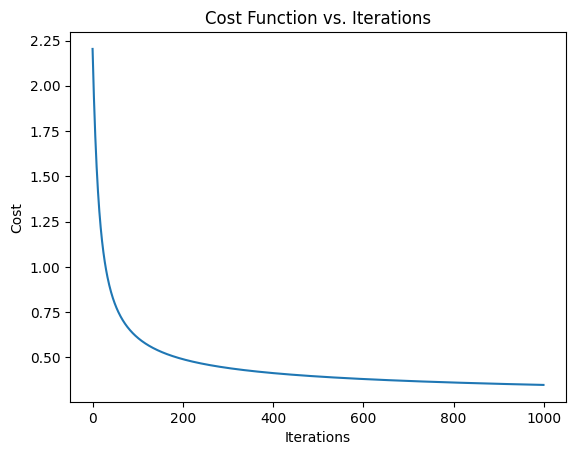

In [ ]:
plt.plot(cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function vs. Iterations')
plt.show()


In [ ]:
print("y_train exists:", "y_train" in locals())
print("y_test exists:", "y_test" in locals())


y_train exists: True
y_test exists: True


In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

y_pred_test = predict_softmax(X_test, W_opt, b_opt)
cm = confusion_matrix(np.argmax(y_test_one_hot, axis=1), y_pred_test)
precision = precision_score(np.argmax(y_test_one_hot, axis=1), y_pred_test, average='weighted')
recall = recall_score(np.argmax(y_test_one_hot, axis=1), y_pred_test, average='weighted')
f1 = f1_score(np.argmax(y_test_one_hot, axis=1), y_pred_test, average='weighted')

print(f"Confusion Matrix:\n{cm}")
print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}")


Confusion Matrix:
[[1127    0    5    2    3   11    9    2   13    3]
 [   0 1274    7   11    1    5    1    4   18    1]
 [   3   15 1028   16   19    2   27   24   33    7]
 [   8    5   34 1051    1   53    9    8   29   21]
 [   1    5    7    1 1094    0   10    4    3   51]
 [  22   14   13   42   12  923   14    7   43   14]
 [   6    2   10    1   10   15 1121    2   10    0]
 [   7   27   23    5   15    3    0 1183    7   29]
 [   9   26   14   36    9   32   13    6 1000   15]
 [   7    6   10   18   42    9    0   38   10 1054]]
Precision: 0.90, Recall: 0.90, F1-Score: 0.90


In [ ]:
from sklearn.datasets import make_classification, make_circles
from sklearn.linear_model import LogisticRegression

X_lin, y_lin = make_classification(n_samples=200, n_features=2, n_redundant=0, n_clusters_per_class=1, random_state=42)
log_reg_lin = LogisticRegression().fit(X_lin, y_lin)

X_nonlin, y_nonlin = make_circles(n_samples=200, noise=0.1, factor=0.5, random_state=42)
log_reg_nonlin = LogisticRegression().fit(X_nonlin, y_nonlin)
